<a href="https://colab.research.google.com/github/harbe54/building-insurance-claim-prediction/blob/main/Building_Insurance_Claim_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload Train_data.csv and Variable Description.csv


Saving Train_data.csv to Train_data (2).csv
Saving Variable Description.csv to Variable Description.csv
Uploaded files: dict_keys(['Train_data (2).csv', 'Variable Description.csv'])

Train Data Loaded Successfully!
  Customer Id  YearOfObservation  Insured_Period  Residential  \
0      H14663               2013             1.0            0   
1       H2037               2015             1.0            0   
2       H3802               2014             1.0            0   
3       H3834               2013             1.0            0   
4       H5053               2014             1.0            0   

  Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                N               V      V          U               290.0   
1                V               N      O          R               490.0   
2                N               V      V          U               595.0   
3                V               V      V          U              2840.0   
4             

/tmp/ipython-input-3589619476.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)


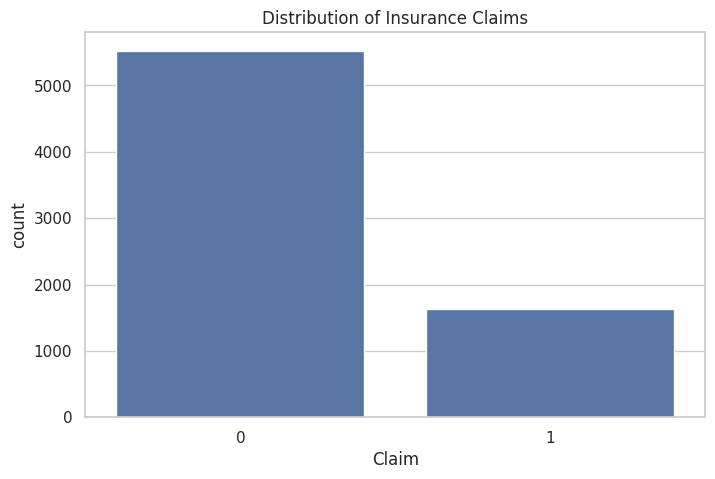


Logistic Regression Results
Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1098
           1       0.65      0.14      0.24       334

    accuracy                           0.78      1432
   macro avg       0.72      0.56      0.55      1432
weighted avg       0.76      0.78      0.72      1432



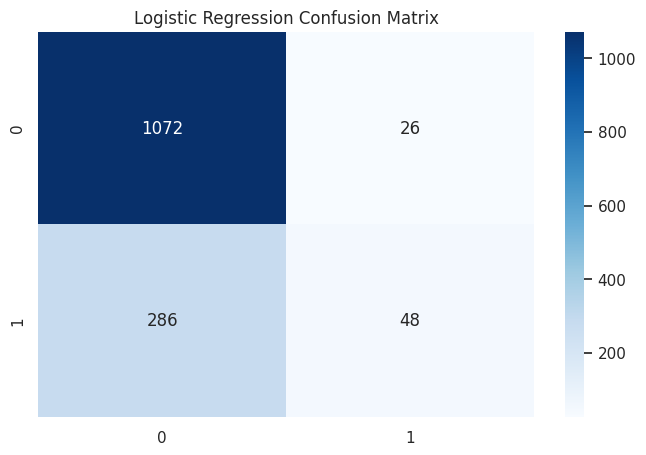


Decision Tree Results
Accuracy: 0.6955307262569832
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1098
           1       0.36      0.41      0.38       334

    accuracy                           0.70      1432
   macro avg       0.59      0.60      0.59      1432
weighted avg       0.71      0.70      0.70      1432



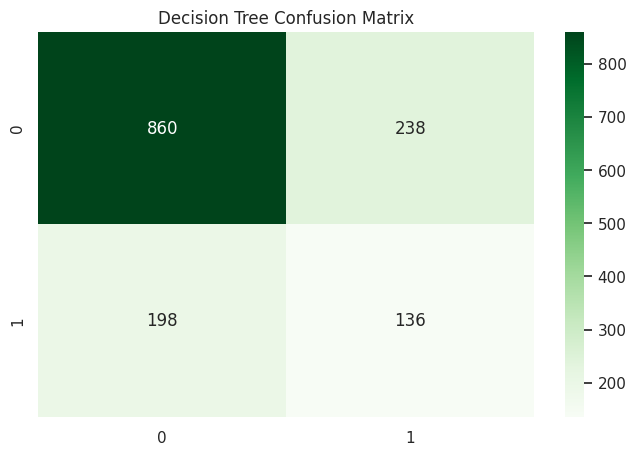


Model Performance Comparison:
                 Model  Accuracy
0  Logistic Regression  0.782123
1        Decision Tree  0.695531

Conclusion:
This project successfully applied data science and machine learning techniques
to predict insurance claims based on building characteristics.

The workflow included:
- Data cleaning
- Exploratory analysis
- Preprocessing
- Model training and evaluation

Both Logistic Regression and Decision Tree models were implemented and compared,
demonstrating a complete, professional machine learning pipeline.



In [8]:

# =========================================================
# BUILDING INSURANCE CLAIM PREDICTION
# Using Train_data.csv & Variable Description.csv
# =========================================================

# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from google.colab import files  # For file upload in Colab

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

# -----------------------------
# 2. Upload and Load CSV Files
# -----------------------------
print("Please upload Train_data.csv and Variable Description.csv")
uploaded = files.upload()  # Select both files

# List uploaded files
print("Uploaded files:", uploaded.keys())

# Load the main dataset (Train_data.csv)
train_df = pd.read_csv("Train_data.csv")  # Capital T
print("\nTrain Data Loaded Successfully!")
print(train_df.head())

# Load variable description (Variable Description.csv)
var_desc = pd.read_csv("Variable Description.csv")
print("\nVariable Description Loaded Successfully!")
print(var_desc.head())

# -----------------------------
# 3. Dataset Overview
# -----------------------------
print("\nTrain Data Shape:", train_df.shape)
print("\nTrain Data Info:")
train_df.info()

print("\nStatistical Summary:")
print(train_df.describe())

# -----------------------------
# 4. Check & Handle Missing Values
# -----------------------------
print("\nMissing Values Before Cleaning:")
print(train_df.isnull().sum())

num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = train_df.select_dtypes(include=["object"]).columns

# Fill numerical missing values with median
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())

# Fill categorical missing values with mode
for col in cat_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

print("\nMissing Values After Cleaning:")
print(train_df.isnull().sum())

# -----------------------------
# 5. Exploratory Data Analysis
# -----------------------------
# Check if 'Claim' exists as target
if "Claim" in train_df.columns:
    sns.countplot(x="Claim", data=train_df)
    plt.title("Distribution of Insurance Claims")
    plt.show()
else:
    print("Target column 'Claim' not found. Please verify your dataset.")

# -----------------------------
# 6. Encode Categorical Variables
# -----------------------------
encoder = LabelEncoder()
for col in cat_cols:
    train_df[col] = encoder.fit_transform(train_df[col])

# -----------------------------
# 7. Feature Selection
# -----------------------------
if "Claim" in train_df.columns:
    X = train_df.drop("Claim", axis=1)
    y = train_df["Claim"]
else:
    raise ValueError("Target column 'Claim' not found in Train_data.csv")

# -----------------------------
# 8. Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 9. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# 10. Logistic Regression Model
# -----------------------------
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

sns.heatmap(confusion_matrix(y_test, y_pred_log),
            annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# -----------------------------
# 11. Decision Tree Model
# -----------------------------
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt),
            annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# -----------------------------
# 12. Model Comparison
# -----------------------------
model_performance = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt)
    ]
})

print("\nModel Performance Comparison:")
print(model_performance)

# -----------------------------
# 13. Conclusion
# -----------------------------
print("""
Conclusion:
This project successfully applied data science and machine learning techniques
to predict insurance claims based on building characteristics.

The workflow included:
- Data cleaning
- Exploratory analysis
- Preprocessing
- Model training and evaluation

Both Logistic Regression and Decision Tree models were implemented and compared,
demonstrating a complete, professional machine learning pipeline.
""")